# Importing necessary libraries

In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Exploring data

In [64]:
df=pd.read_csv('taxis_trip.csv')

In [65]:
df.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,89D227B655E5C82AECF13C3F540D4CF4,BA96DE419E711691B9445D6A6307C170,CMT,1,N,2013-01-01 15:11:48,2013-01-01 15:18:10,4,382,1.0,-73.978165,40.757977,-73.989838,40.751171
1,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N,2013-01-06 00:18:35,2013-01-06 00:22:54,1,259,1.5,-74.006683,40.731781,-73.994499,40.750660
2,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N,2013-01-05 18:49:41,2013-01-05 18:54:23,1,282,1.1,-74.004707,40.737770,-74.009834,40.726002
3,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:54:15,2013-01-07 23:58:20,2,244,0.7,-73.974602,40.759945,-73.984734,40.759388
4,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:25:03,2013-01-07 23:34:24,1,560,2.1,-73.976250,40.748528,-74.002586,40.747868


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
medallion             100000 non-null object
hack_license          100000 non-null object
vendor_id             100000 non-null object
rate_code             100000 non-null int64
store_and_fwd_flag    373 non-null object
pickup_datetime       100000 non-null object
dropoff_datetime      100000 non-null object
passenger_count       100000 non-null int64
trip_time_in_secs     100000 non-null int64
trip_distance         100000 non-null float64
pickup_longitude      100000 non-null float64
pickup_latitude       100000 non-null float64
dropoff_longitude     100000 non-null float64
dropoff_latitude      100000 non-null float64
dtypes: float64(5), int64(3), object(6)
memory usage: 10.7+ MB


# Step1: computing the mean

In [67]:
train_df,valid_df=train_test_split(df,test_size=.2,random_state=42)

In [68]:
trip_duration_mean=train_df['trip_time_in_secs'].mean()

In [69]:
valid_df['prediction']=trip_duration_mean

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [70]:
pred=valid_df['prediction']
label=valid_df['trip_time_in_secs']
mean_squared_error(label,pred)

215175.43446959893

In [71]:
# As you can see it is a huge number and in mse the smaller the better ,
#so we will try to use machine learning to improve the accuracy and reduce the error

# First:- Data Preparation

In [72]:
# As you know 80% of the machine learning work is basically data cleaning 
#so before we use our linear models let's prepare the data so that our model can learn the best 
#from it and get optimal results.

In [73]:
df['store_and_fwd_flag'].isna().sum()

99627

In [74]:
# as you can see this column is not useful at all to our model since it contains
#too many null values,so we will drop it

In [75]:
# as you can see the date columns are object ,so we start by converting them to datetime object.

df["dropoff_datetime"] = pd.to_datetime(df["dropoff_datetime"], format='%Y-%m-%d %H:%M:%S')
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"], format='%Y-%m-%d %H:%M:%S')

In [76]:
df["pickup_month"] = df["pickup_datetime"].dt.month
df["pickup_day"] = df["pickup_datetime"].dt.day
df["pickup_weekday"] = df["pickup_datetime"].dt.weekday
df["pickup_hour"] = df["pickup_datetime"].dt.hour
df["pickup_minute"] = df["pickup_datetime"].dt.minute


# Data Visualization

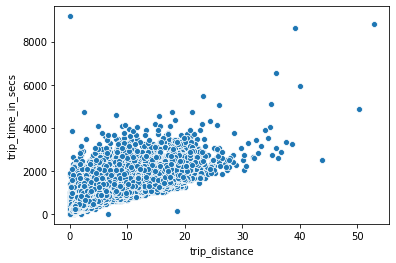

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df, x="trip_distance", y="trip_time_in_secs")
plt.show()

In [79]:
# as you can see from the graph there is almost a linear relation between distance and time , which makes sense
# on the hand I believe there are some ouliers which will reduce our model performance
# so let's filter them out

In [80]:
df=df[df['trip_time_in_secs']<=5000]

In [81]:
df=df[df['trip_distance']<=40]

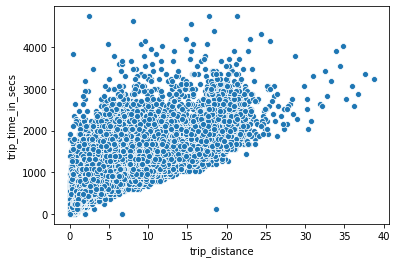

In [82]:
sns.scatterplot(data=df, x="trip_distance", y="trip_time_in_secs")
plt.show()

In [83]:
# now that is more like it

In [84]:
df[df['trip_time_in_secs']==0]

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_month,pickup_day,pickup_weekday,pickup_hour,pickup_minute
324,D83BF451B46974F22850BA3DBBA7729E,70211D5E293D6F009DC28965639A2EC2,VTS,2,NaN,2013-01-13 11:14:00,2013-01-13 11:14:00,1,0,0.01,-73.991867,40.758301,-73.985252,40.755203,1,13,6,11,14
473,D57C7392455C38D9404660F7BC63D1B6,8B32D59D8277E765E95BC45565C120F3,VTS,5,NaN,2013-01-13 11:10:00,2013-01-13 11:10:00,1,0,0.00,0.000000,0.000000,0.000000,0.000000,1,13,6,11,10
859,19BF1BB516C4E992EA3FBAEDA73D6262,E4CAC9101BFE631554B57906364761D3,VTS,2,NaN,2013-01-13 10:33:00,2013-01-13 10:33:00,5,0,0.00,0.000000,0.000000,0.000000,0.000000,1,13,6,10,33
899,D57C7392455C38D9404660F7BC63D1B6,EC5837D805127379D72FF6C35279890B,VTS,1,NaN,2013-01-13 04:58:00,2013-01-13 04:58:00,1,0,0.05,0.000000,0.000000,0.000000,0.000000,1,13,6,4,58
1059,67108EDF8123623806A1DAFE8811EE63,36C9437BD2FF31940BEBED44DDDDDB8A,VTS,5,NaN,2013-01-13 04:58:00,2013-01-13 04:58:00,1,0,0.00,0.000000,0.000000,0.000000,0.000000,1,13,6,4,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99016,3541D0677EEEA07B67E645E12F04F517,5514E59A5CEA0379EA6F7F12ABE87489,VTS,1,NaN,2013-01-13 17:37:00,2013-01-13 17:37:00,1,0,0.03,0.000000,0.000000,0.000000,0.000000,1,13,6,17,37
99209,5562E98BA4BD4057E5626F1C64AF72B3,B850A506A372259D59D4D8423E0FD0DD,VTS,1,NaN,2013-01-13 17:03:00,2013-01-13 17:03:00,1,0,0.00,-74.008430,40.714352,-74.008247,40.714512,1,13,6,17,3
99595,C55D5C56D4C88F3EB9BB754232B36648,D9CC895746042198E4DBD514AE08E99C,VTS,2,NaN,2013-01-13 17:39:00,2013-01-13 17:39:00,2,0,0.03,-73.994064,40.756783,-73.993607,40.756721,1,13,6,17,39
99654,CAAD4751DFACEB196B094256D2A24F33,FA39FF80332DDF9D426F7E8763B9FC3E,VTS,2,NaN,2013-01-13 16:30:00,2013-01-13 16:30:00,5,0,0.00,-73.991951,40.748997,-73.992096,40.749065,1,13,6,16,30


In [85]:
df[df['trip_distance']==0]

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_month,pickup_day,pickup_weekday,pickup_hour,pickup_minute
88,20D9ECB2CA0767CF7A01564DF2844A3E,598CCE5B9C1918568DEE71F43CF26CD2,CMT,1,N,2013-01-08 07:51:16,2013-01-08 07:51:20,1,4,0.0,-73.945396,40.802090,-73.945412,40.802025,1,8,1,7,51
308,66764B77F96DF43315499D73AA6DD84E,FA094478696E177A9724AAE5C5CF977C,VTS,1,NaN,2013-01-13 11:11:00,2013-01-13 11:13:00,1,120,0.0,-74.004791,40.725842,-74.004868,40.725876,1,13,6,11,11
473,D57C7392455C38D9404660F7BC63D1B6,8B32D59D8277E765E95BC45565C120F3,VTS,5,NaN,2013-01-13 11:10:00,2013-01-13 11:10:00,1,0,0.0,0.000000,0.000000,0.000000,0.000000,1,13,6,11,10
496,2886A4D0E61E8FAD6604A02A50F1A318,E3199D5923AEBE5B40A822068CACC8D0,VTS,5,NaN,2013-01-13 04:51:00,2013-01-13 04:52:00,1,60,0.0,-73.861534,40.889069,-73.861534,40.889069,1,13,6,4,51
622,232840CC49C3846876B29C434104F356,C740F0FCA87B7F2C5E0B779D19BA3504,VTS,5,NaN,2013-01-13 04:38:00,2013-01-13 04:39:00,2,60,0.0,0.000000,0.000000,0.000000,0.000000,1,13,6,4,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99209,5562E98BA4BD4057E5626F1C64AF72B3,B850A506A372259D59D4D8423E0FD0DD,VTS,1,NaN,2013-01-13 17:03:00,2013-01-13 17:03:00,1,0,0.0,-74.008430,40.714352,-74.008247,40.714512,1,13,6,17,3
99365,3AC3AB85F6E59CB391253FA638B854AA,C8C570EFE42867D3D5BD3D7D344FB2D9,VTS,5,NaN,2013-01-13 17:42:00,2013-01-13 17:43:00,1,60,0.0,-73.979301,40.684711,-73.979309,40.684731,1,13,6,17,42
99654,CAAD4751DFACEB196B094256D2A24F33,FA39FF80332DDF9D426F7E8763B9FC3E,VTS,2,NaN,2013-01-13 16:30:00,2013-01-13 16:30:00,5,0,0.0,-73.991951,40.748997,-73.992096,40.749065,1,13,6,16,30
99746,474DFB64CE6ED26BB41011B06D35E77D,12DF08C467CE0D44897DFB82171CBC63,VTS,5,NaN,2013-01-13 19:33:00,2013-01-13 19:34:00,2,60,0.0,0.000000,0.000000,0.000000,0.000000,1,13,6,19,33


In [86]:
# As you can see some thing doesn't make sense here, distance = 0 ?  and duration =0?
# i believe they are mistakes, even if they are not we want our model to predict actual
#duration with actual distance, that is what a real trip would mean
# so let's filter them out as well

In [87]:
df=df[df['trip_distance']>0]

In [88]:
df=df[df['trip_time_in_secs']>0]

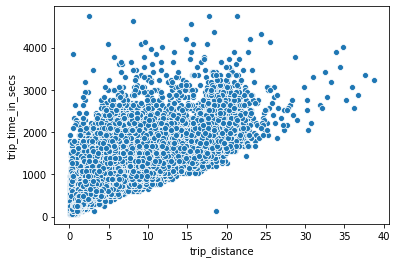

In [89]:
sns.scatterplot(data=df, x="trip_distance", y="trip_time_in_secs")
plt.show()

In [90]:
# perfect right !

# Feature Engineering

In [91]:
#now feature engineering time !
#let's add some features that may help our model predict better

In [92]:
def part_of_day (t):
    if t in range (6,12):
        return "Morning"
    elif t in range (12,18):
        return "Afternoon"
    elif t in range (18,21):
        return "Evening"
    else:
        return "Night"

In [93]:
df['pickup_part_of_day']=df['pickup_hour'].apply(part_of_day)

In [94]:
# how about one more

In [95]:
# speed as Miles per Hour
df['average_speed'] = df['trip_distance']/(df['trip_time_in_secs']/3600)

In [96]:
df.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,...,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_month,pickup_day,pickup_weekday,pickup_hour,pickup_minute,pickup_part_of_day,average_speed
0,89D227B655E5C82AECF13C3F540D4CF4,BA96DE419E711691B9445D6A6307C170,CMT,1,N,2013-01-01 15:11:48,2013-01-01 15:18:10,4,382,1.0,...,40.757977,-73.989838,40.751171,1,1,1,15,11,Afternoon,9.424084
1,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N,2013-01-06 00:18:35,2013-01-06 00:22:54,1,259,1.5,...,40.731781,-73.994499,40.750660,1,6,6,0,18,Night,20.849421
2,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N,2013-01-05 18:49:41,2013-01-05 18:54:23,1,282,1.1,...,40.737770,-74.009834,40.726002,1,5,5,18,49,Evening,14.042553
3,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:54:15,2013-01-07 23:58:20,2,244,0.7,...,40.759945,-73.984734,40.759388,1,7,0,23,54,Night,10.327869
4,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:25:03,2013-01-07 23:34:24,1,560,2.1,...,40.748528,-74.002586,40.747868,1,7,0,23,25,Night,13.500000


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99407 entries, 0 to 99999
Data columns (total 21 columns):
medallion             99407 non-null object
hack_license          99407 non-null object
vendor_id             99407 non-null object
rate_code             99407 non-null int64
store_and_fwd_flag    371 non-null object
pickup_datetime       99407 non-null datetime64[ns]
dropoff_datetime      99407 non-null datetime64[ns]
passenger_count       99407 non-null int64
trip_time_in_secs     99407 non-null int64
trip_distance         99407 non-null float64
pickup_longitude      99407 non-null float64
pickup_latitude       99407 non-null float64
dropoff_longitude     99407 non-null float64
dropoff_latitude      99407 non-null float64
pickup_month          99407 non-null int64
pickup_day            99407 non-null int64
pickup_weekday        99407 non-null int64
pickup_hour           99407 non-null int64
pickup_minute         99407 non-null int64
pickup_part_of_day    99407 non-null object


In [98]:
# what a relief , I believe we are now ready to go , fasten your seatbelts guys!

In [99]:
#before training our model we must choose wisely what columns to feed to the model
# i will start by dropping some irrelevant columns like medallion, hack_license, vendor_id
# the previuos columns will add nothing important to our model
# I will also drop pickup_longitude , pickup_latitude, dropoff_longitude, dropoff_latitude
# because I believe that the purpose of these features is to calculate the distance which we already have
#I will also drop pickup_datetime, dropoff_datetime . we already extracted better data from these columns
# finally i will drop store_and_fwd_flag columns since it has too many null values

In [100]:
df_copy_1=df.drop(['medallion','hack_license','vendor_id','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','pickup_datetime','dropoff_datetime','store_and_fwd_flag'],axis=1)

In [101]:
# we must convert the object column to one hot encoding to feed it to our model
df_copy_1=pd.get_dummies(df_copy_1)

In [102]:
df_copy_1.head()

,rate_code,passenger_count,trip_time_in_secs,trip_distance,pickup_month,pickup_day,pickup_weekday,pickup_hour,pickup_minute,average_speed,pickup_part_of_day_Afternoon,pickup_part_of_day_Evening,pickup_part_of_day_Morning,pickup_part_of_day_Night
0,1,4,382,1.0,1,1,1,15,11,9.424084,1,0,0,0
1,1,1,259,1.5,1,6,6,0,18,20.849421,0,0,0,1
2,1,1,282,1.1,1,5,5,18,49,14.042553,0,1,0,0
3,1,2,244,0.7,1,7,0,23,54,10.327869,0,0,0,1
4,1,1,560,2.1,1,7,0,23,25,13.500000,0,0,0,1


In [103]:
df_copy_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99407 entries, 0 to 99999
Data columns (total 14 columns):
rate_code                       99407 non-null int64
passenger_count                 99407 non-null int64
trip_time_in_secs               99407 non-null int64
trip_distance                   99407 non-null float64
pickup_month                    99407 non-null int64
pickup_day                      99407 non-null int64
pickup_weekday                  99407 non-null int64
pickup_hour                     99407 non-null int64
pickup_minute                   99407 non-null int64
average_speed                   99407 non-null float64
pickup_part_of_day_Afternoon    99407 non-null uint8
pickup_part_of_day_Evening      99407 non-null uint8
pickup_part_of_day_Morning      99407 non-null uint8
pickup_part_of_day_Night        99407 non-null uint8
dtypes: float64(2), int64(8), uint8(4)
memory usage: 8.7 MB


In [104]:
# beautiful right
# now i believe we are ready to train our model

# Modeling

In [105]:
x_train,x_valid,y_train,y_valid=train_test_split(df_copy_1.drop('trip_time_in_secs',axis=1),df_copy_1['trip_time_in_secs'],test_size=.2,random_state=42)

# Linear regression

In [106]:
#first model
from sklearn.linear_model import LinearRegression

In [107]:
model= LinearRegression().fit(x_train, y_train)

In [108]:
prediction=model.predict(x_valid)

In [109]:
mean_squared_error(y_valid,prediction)

34981.49194108566

In [110]:
# wow that is a relief 
# if you remember our error when we computed the mean as our prediction was 215175.43
#now we cut it down to 34981.49 only by data cleaning

In [111]:
# to make sure our model is not overfitting we use k-fold cross validation technique
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,df_copy_1.drop('trip_time_in_secs',axis=1),df_copy_1['trip_time_in_secs'], scoring='neg_mean_squared_error',cv=10)*-1
scores.mean()

38565.96678559688

In [112]:
# there is a beautiful yet effective  trick to improve performance in linear problems
# we take the natural log of the output because it helps converts the distribution of the output 
#to normal distribution by reducing the skewness  which helps linear models learn better hence 
#predict better

In [113]:
y_train_log=np.log(y_train)
y_valid_log=np.log(y_valid)

In [114]:
model= LinearRegression().fit(x_train, y_train_log)

In [115]:
prediction=model.predict(x_valid)

In [116]:
mean_squared_error(y_valid_log,prediction)

0.15542180817158216

In [117]:
# wow look at the differece, huge right ,feel free to change random state value in split function 
# to make sure that the model generalizes well and not overfitting.

# XGBoost

In [118]:
from xgboost import XGBRegressor
model = XGBRegressor().fit(x_train, y_train)


In [119]:
prediction=model.predict(x_valid)
mean_squared_error(y_valid,prediction)

396.9746740252692

In [120]:
scores=cross_val_score(model,df_copy_1.drop('trip_time_in_secs',axis=1),df_copy_1['trip_time_in_secs'], scoring='neg_mean_squared_error',cv=10)*-1
scores.mean()

361.46744089369474

In [121]:
model= XGBRegressor().fit(x_train, y_train_log)
prediction=model.predict(x_valid)
mean_squared_error(y_valid_log,prediction)

0.00020515849014025698

In [122]:
# woooooow look at that almost zero

# Random Forest Classifier

In [123]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor().fit(x_train, y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [124]:
prediction=model.predict(x_valid)
mean_squared_error(y_valid,prediction)

426.15321698018306

In [125]:
scores=cross_val_score(model,df_copy_1.drop('trip_time_in_secs',axis=1),df_copy_1['trip_time_in_secs'], scoring='neg_mean_squared_error',cv=10)*-1
scores.mean()

394.0861138948569

In [126]:
model= RandomForestRegressor().fit(x_train, y_train_log)
prediction=model.predict(x_valid)
mean_squared_error(y_valid_log,prediction)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.0001422295901686317

# SGDRegressor

In [127]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor().fit(x_train, y_train)

In [128]:
prediction=model.predict(x_valid)
mean_squared_error(y_valid,prediction)

7765485993.756086

In [129]:
scores=cross_val_score(model,df_copy_1.drop('trip_time_in_secs',axis=1),df_copy_1['trip_time_in_secs'], scoring='neg_mean_squared_error',cv=10)*-1
scores.mean()

13308732694.412569

In [130]:
model= SGDRegressor().fit(x_train, y_train_log)
prediction=model.predict(x_valid)
mean_squared_error(y_valid_log,prediction)

3351807796.5664916

# Extra Trees Regressor

In [131]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor().fit(x_train, y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [132]:
prediction=model.predict(x_valid)
mean_squared_error(y_valid,prediction)

570.0361920329946

In [133]:
scores=cross_val_score(model,df_copy_1.drop('trip_time_in_secs',axis=1),df_copy_1['trip_time_in_secs'], scoring='neg_mean_squared_error',cv=10)*-1
scores.mean()

476.7597876868191

In [134]:
model= ExtraTreesRegressor().fit(x_train, y_train_log)
prediction=model.predict(x_valid)
mean_squared_error(y_valid_log,prediction)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.0001687805339033536

# Best model

In [135]:
# As you can see all the models performed well except for SGDRegressor maybe needed hyperparameter tuning
# I choose XGBoostRegressor as the best model since the cross validation is the least error among all
# which guarantees that there is no overfitting.

In [136]:
#XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework.
#XGBoost is a popular and efficient open-source implementation of the gradient boosted trees algorithm.
#When using gradient boosting for regression, the weak learners are regression trees, and each regression tree
#maps an input data point to one of its leafs that contains a continuous score.


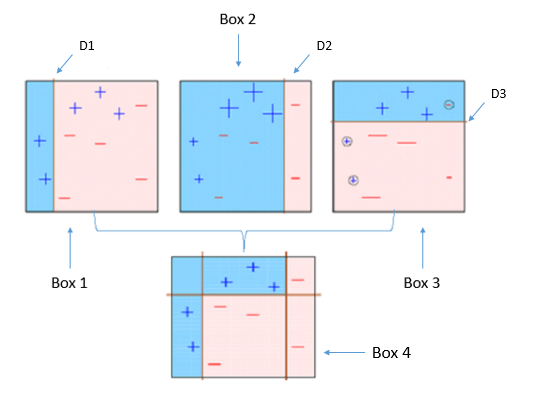

In [137]:
# Thanks